In [1]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
import nnfs

style.use("dark_background")

# Neural Network Batch Load Example

In [2]:
inputs = [[1.0, 2.0, 3.0, 2.5],\
          [2.0, 5.0, -1.0, 2.0],\
          [-1.5, 2.7, 3.3, -0.8]]

#hidden layer 1
weights = [[0.2, 0.8, -0.5, 1.0],\
           [0.5, -0.91, 0.26, -0.5],\
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

## output layout ##
#columns = Neurons
#rows = SampleResultants
print(layer1_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [3]:
weights2 = [[0.1, -0.14, 0.5],\
            [-0.5, 0.12, -0.33],\
            [-0.44, 0.73, -0.13]]
biases = [-1, 2, -0.5]

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


# Mock data for classification neural network

## Mock Data and classes plot

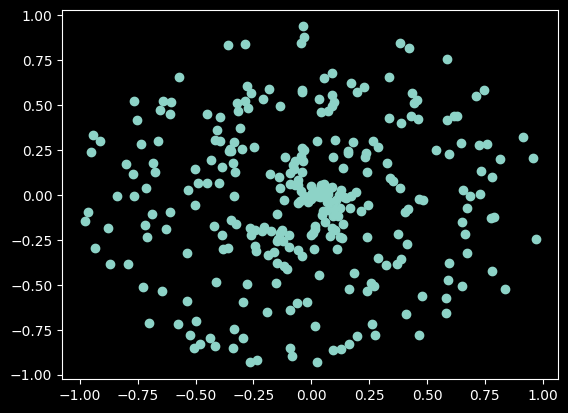

In [4]:
nnfs.init()

X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1])
plt.show()

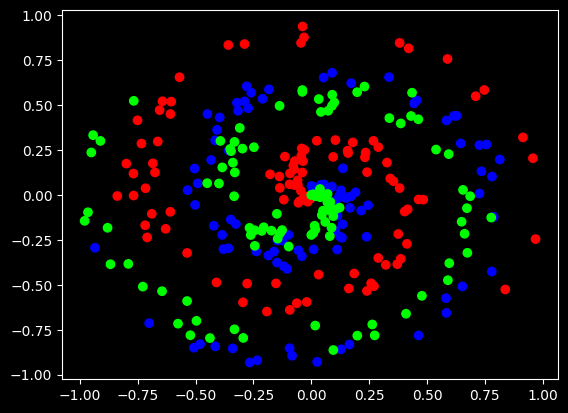

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

# Softmax Function Examples

### Example: hardcoded Soft Max function

In [6]:
#Softmax = e^Z_i,j / Sum_l=1->L(e^Z_i,l) 
#Output: Normalized probability distribution for classes. Returns confidence scores for each class

prac_layer_outputs = [4.8, 1.21, 2.385]
E = 2.71828182846 #mathematical constant e

#for each value in a vector, calculate the exponential value
prac_exp_values = []
for ouput in prac_layer_outputs:
    prac_exp_values.append(E**ouput)
print("exponentiated values:")
print(prac_exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [7]:
norm_base = sum(prac_exp_values) #Sum l=1->L(e^Z_i,l)
norm_values = []

for value in prac_exp_values:
    norm_values.append(value/norm_base)
print("normalzed values")
print(norm_values)
print(sum(norm_values)) #shows all scores will add up to 1.0 

normalzed values
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
1.0


### Example: Softmax function with numpy

In [8]:
norm_base = []
norm_values = []
prac_exp_values = []

prac_exp_values = np.exp(prac_layer_outputs) #exponential value of each value
print("prac_exp_values", prac_exp_values)

norm_values = prac_exp_values / sum(prac_exp_values)
print("normalzed values & Sum", norm_values, sum(norm_values))

prac_exp_values [121.51041752   3.35348465  10.85906266]
normalzed values & Sum [0.89528266 0.02470831 0.08000903] 0.9999999999999999


# Regression
find a scalar value

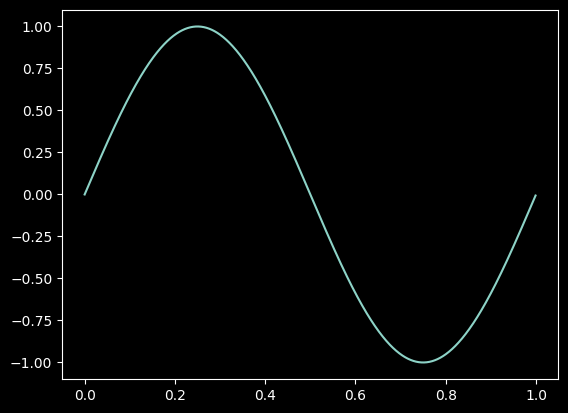

In [9]:
from nnfs.datasets import sine_data
nnfs.init()

X, y = sine_data()
plt.plot(X,y)
plt.show()

## Regression Model

In [10]:
X, y = sine_data()

#instantiate model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(1,64))
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(64,64))
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(64,1))
model.add(nnfs_module.Activation_Linear())
print(model.layers)

#set loss and optimizer objects
model.set(\
          loss=nnfs_module.Loss_MeanSquaredError(),\
          optimizer=nnfs_module.Optimizer_Adam(learning_rate=0.005, decay=1e-3),\
          accuracy=nnfs_module.Accuracy_Regression()
)

#finalize the model
model.finalize()

#finalize the model
model.finalize()

#train the model
model.train(X, y, epochs=1000, print_every=100)

[<NeuralNet_FromScratch.Layer_Dense object at 0x7fda49a9a550>, <NeuralNet_FromScratch.ReLU_Activation object at 0x7fda49a9a5d0>, <NeuralNet_FromScratch.Layer_Dense object at 0x7fda49b38650>, <NeuralNet_FromScratch.ReLU_Activation object at 0x7fda49a9a790>, <NeuralNet_FromScratch.Layer_Dense object at 0x7fda49a9aad0>, <NeuralNet_FromScratch.Activation_Linear object at 0x7fda49a9a950>]
epoch: 100, acc: 0.017, loss: 0.049 (data_loss: 0.049, reg_loss: 0.000000), lr: 0.004549590536851684
epoch: 200, acc: 0.420, loss: 0.001 (data_loss: 0.001, reg_loss: 0.000000), lr: 0.004170141784820684
epoch: 300, acc: 0.787, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000000), lr: 0.003849114703618168
epoch: 400, acc: 0.885, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000000), lr: 0.0035739814152966403
epoch: 500, acc: 0.053, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000000), lr: 0.00333555703802535
epoch: 600, acc: 0.913, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000000), lr: 0.0031269543464665416
epoch:

# Binary logistic Regression Model

In [11]:
#create training and test datasets
X, y = spiral_data(samples=100, classes=2)
X_test, y_test = spiral_data(samples=100, classes=2)

#Reshape labels to be a list of lists
#inner list contains 1 output (0 or 1)
#per each output neuron
y = y.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#instantiate model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(2, 64, weight_lambda_l2=5e-4,\
                      bias_lambda_l2=5e-4))
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(64,1))
model.add(nnfs_module.Activation_Sigmoid())

model.set(loss=nnfs_module.Loss_BinaryCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=5e-7),\
         accuracy=nnfs_module.Accuracy_Categorical(binary=True))

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
            epochs=10000, print_every=100)

epoch: 100, acc: 0.595, loss: 0.676 (data_loss: 0.675, reg_loss: 0.001203), lr: 0.0009999505024501287
epoch: 200, acc: 0.610, loss: 0.674 (data_loss: 0.673, reg_loss: 0.001346), lr: 0.0009999005098992651
epoch: 300, acc: 0.620, loss: 0.671 (data_loss: 0.669, reg_loss: 0.001594), lr: 0.000999850522346909
epoch: 400, acc: 0.635, loss: 0.665 (data_loss: 0.663, reg_loss: 0.002285), lr: 0.0009998005397923115
epoch: 500, acc: 0.630, loss: 0.658 (data_loss: 0.654, reg_loss: 0.003487), lr: 0.0009997505622347225
epoch: 600, acc: 0.635, loss: 0.648 (data_loss: 0.643, reg_loss: 0.005181), lr: 0.0009997005896733929
epoch: 700, acc: 0.660, loss: 0.638 (data_loss: 0.630, reg_loss: 0.007390), lr: 0.0009996506221075735
epoch: 800, acc: 0.680, loss: 0.626 (data_loss: 0.616, reg_loss: 0.010098), lr: 0.000999600659536515
epoch: 900, acc: 0.725, loss: 0.614 (data_loss: 0.601, reg_loss: 0.013250), lr: 0.0009995507019594694
epoch: 1000, acc: 0.765, loss: 0.602 (data_loss: 0.585, reg_loss: 0.016693), lr: 0.0

epoch: 8100, acc: 0.980, loss: 0.204 (data_loss: 0.123, reg_loss: 0.081253), lr: 0.0009959668323125503
epoch: 8200, acc: 0.980, loss: 0.202 (data_loss: 0.122, reg_loss: 0.080773), lr: 0.000995917237285747
epoch: 8300, acc: 0.980, loss: 0.201 (data_loss: 0.120, reg_loss: 0.080287), lr: 0.000995867647197952
epoch: 8400, acc: 0.980, loss: 0.199 (data_loss: 0.119, reg_loss: 0.079801), lr: 0.0009958180620484277
epoch: 8500, acc: 0.980, loss: 0.197 (data_loss: 0.118, reg_loss: 0.079335), lr: 0.0009957684818364362
epoch: 8600, acc: 0.985, loss: 0.195 (data_loss: 0.116, reg_loss: 0.078857), lr: 0.0009957189065612402
epoch: 8700, acc: 0.985, loss: 0.194 (data_loss: 0.115, reg_loss: 0.078394), lr: 0.000995669336222102
epoch: 8800, acc: 0.985, loss: 0.192 (data_loss: 0.114, reg_loss: 0.077930), lr: 0.000995619770818285
epoch: 8900, acc: 0.985, loss: 0.190 (data_loss: 0.113, reg_loss: 0.077494), lr: 0.0009955702103490519
epoch: 9000, acc: 0.985, loss: 0.189 (data_loss: 0.112, reg_loss: 0.077055), 

# Softmax Activation Classification Model with Cross Entropy Loss w/ dropout layer

In [12]:
#create dataset
X, y = spiral_data(samples=100, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

#instantiate model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(2, 64, weight_lambda_l2=5e-4,\
                    bias_lambda_l2=5e-4))
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dropout(0.1))
model.add(nnfs_module.Layer_Dense(64,3))
model.add(nnfs_module.Activation_Softmax())

#set loss, optimizer and accuract objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(learning_rate=0.05, decay=5e-5),
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=10000, print_every=100)

epoch: 100, acc: 0.627, loss: 0.817 (data_loss: 0.779, reg_loss: 0.038471), lr: 0.04975371909050202
epoch: 200, acc: 0.677, loss: 0.751 (data_loss: 0.702, reg_loss: 0.049654), lr: 0.049507401356502806
epoch: 300, acc: 0.700, loss: 0.731 (data_loss: 0.675, reg_loss: 0.056029), lr: 0.0492635105177595
epoch: 400, acc: 0.717, loss: 0.725 (data_loss: 0.665, reg_loss: 0.060353), lr: 0.04902201088288642
epoch: 500, acc: 0.720, loss: 0.683 (data_loss: 0.622, reg_loss: 0.060954), lr: 0.048782867456949125
epoch: 600, acc: 0.703, loss: 0.692 (data_loss: 0.629, reg_loss: 0.062723), lr: 0.04854604592455945
epoch: 700, acc: 0.747, loss: 0.655 (data_loss: 0.592, reg_loss: 0.063299), lr: 0.048311512633460556
epoch: 800, acc: 0.697, loss: 0.672 (data_loss: 0.609, reg_loss: 0.063384), lr: 0.04807923457858551
epoch: 900, acc: 0.720, loss: 0.663 (data_loss: 0.599, reg_loss: 0.063166), lr: 0.04784917938657352
epoch: 1000, acc: 0.757, loss: 0.614 (data_loss: 0.551, reg_loss: 0.062892), lr: 0.047621315300728

epoch: 8300, acc: 0.770, loss: 0.537 (data_loss: 0.479, reg_loss: 0.058271), lr: 0.035336937700978836
epoch: 8400, acc: 0.793, loss: 0.507 (data_loss: 0.449, reg_loss: 0.058448), lr: 0.03521250748265784
epoch: 8500, acc: 0.780, loss: 0.532 (data_loss: 0.473, reg_loss: 0.058936), lr: 0.035088950489490865
epoch: 8600, acc: 0.803, loss: 0.562 (data_loss: 0.503, reg_loss: 0.058854), lr: 0.0349662575614532
epoch: 8700, acc: 0.753, loss: 0.567 (data_loss: 0.508, reg_loss: 0.058733), lr: 0.034844419666190465
epoch: 8800, acc: 0.783, loss: 0.543 (data_loss: 0.485, reg_loss: 0.058041), lr: 0.034723427896801974
epoch: 8900, acc: 0.777, loss: 0.566 (data_loss: 0.508, reg_loss: 0.057597), lr: 0.03460327346967023
epoch: 9000, acc: 0.790, loss: 0.623 (data_loss: 0.566, reg_loss: 0.057391), lr: 0.034483947722335255
epoch: 9100, acc: 0.763, loss: 0.544 (data_loss: 0.486, reg_loss: 0.057771), lr: 0.034365442111412764
epoch: 9200, acc: 0.777, loss: 0.560 (data_loss: 0.501, reg_loss: 0.058049), lr: 0.034

In [13]:
# #close interactive figure 
# try:
#     plt.close(fig)
# except:
#     pass

# #switch back to inline mode
# %matplotlib inline

In [14]:
# import time
# import matplotlib
# matplotlib.use('TkAgg')

# #create dense layer with 1 input feature and 64 output values
# dense1 = Layer_Dense(1,64)

# #create ReLU activation (to be used with Dense Layer)
# activation1 = ReLU_Activation()

# #create 2nd dense layer with 64 input features
# #as we take output from previous layer
# #we output 64 values as there is 64 neurons in this layer
# dense2 = Layer_Dense(64, 64)

# #create ReLU activation activation
# activation2 = ReLU_Activation()

# #create 3rd dense layer with 64 input features
# #we take output of previous layer and output 1
# dense3 = Layer_Dense(64,1)

# #create linear activation
# activation3 = Activation_Linear()

# #create loss function
# loss_function = Loss_MeanSquaredError()

# #create optimizer
# optimizer = Optimizer_Adam(learning_rate=0.005, decay=1e-3)

# #accuracy precision for accuracy calculation
# #here we'll calculate this precision as a fraction of the standard deviation
# #of all the ground truth values
# #this fraction factor can be increased to create a more strict
# #accuracy metric
# #this means our training dataset should be as normal as possible as 
# #std is less reliable with non-normal distributions
# accuracy_precision = np.std(y) / 250


# ###### Plot Weights, biases, and model training #########
# plt.ion() #enable interactive mode
# fig = plt.figure()

# #model training
# ax1 = plt.subplot2grid((1,8),(0,0), rowspan=1, colspan=2)

# #dense 1 weights and biases
# ax2 = plt.subplot2grid((1,8),(0,2), rowspan=1, colspan=1)
# ax3 = plt.subplot2grid((1,8),(0,3), rowspan=1, colspan=1)

# #dense2 weights & biases
# ax4 = plt.subplot2grid((1,8),(0,4), rowspan=1, colspan=1)
# ax5 = plt.subplot2grid((1,8),(0,5), rowspan=1, colspan=1)

# #dense3 weights & biases
# ax6 = plt.subplot2grid((1,8),(0,6), rowspan=1, colspan=1)
# ax7 = plt.subplot2grid((1,8),(0,7), rowspan=1, colspan=1)

# line1, = ax1.plot(X, y)
# line2, = ax1.plot([0,1],[0,1])
# ########################################################


# #train in loop
# for epoch in range(10001):
#     #perform a forward pass of our training data through 1st layer
#     dense1.forward(X)

#     #perform forward pass through activation function
#     #takes output of first layer as input
#     activation1.forward(dense1.output)

#     #perform forward pass through 2nd dense layer
#     #takes outputs of activation function
#     #of first layer as inputs
#     dense2.forward(activation1.output)

#     #perform forward pass through activation function
#     #takes output of 2nd dense layer as input
#     activation2.forward(dense2.output)
    
#     #perform pass through 3rd dense layer
#     #takes outputs of activation function of 2nd dense layer
#     dense3.forward(activation2.output)
    
#     #perform forward pass through activation function
#     #takes outputs of 3rd dense layer as inputs
#     activation3.forward(dense3.output)
    

#     #calculate data loss
#     data_loss = loss_function.calculate(activation3.output, y)

#     #calculate regulaization penalty
#     regularization_loss = \
#         loss_function.regularization_loss(dense1) + \
#         loss_function.regularization_loss(dense2) + \
#         loss_function.regularization_loss(dense3)

#     #calculate overall loss
#     loss = data_loss + regularization_loss

#     #calculate accuracy from output of activation 2 and targets
#     #caculated by taking absolute difference between targets and predictions
#     #and compare if differences are lower than precision value
#     preds = activation3.output
#     accuracy = np.mean(np.abs(preds - y) < accuracy_precision)
    
        
#     if not epoch % 100:
#         #plot X vs preds
#         line2.set_xdata(X)
#         line2.set_ydata(preds)
        
#         dense1_wgraph = np.rot90(dense1.weights.tolist(), k=3)
#         dense1_bgraph = np.rot90(dense1.biases.tolist(), k=3)
        
#         dense2_wgraph = np.rot90(dense2.weights.tolist(), k=3)
#         dense2_bgraph = np.rot90(dense2.biases.tolist(), k=3)
        
#         dense3_wgraph = dense3.weights.tolist()
#         dense3_bgraph = np.rot90(dense3.biases.tolist(), k=3)
        
#         ax2.imshow(dense1_wgraph, cmap='seismic')
#         ax3.imshow(dense1_bgraph, cmap='seismic')
#         ax4.imshow(dense2_wgraph, cmap='seismic')
#         ax5.imshow(dense2_bgraph, cmap='seismic')
#         ax6.imshow(dense3_wgraph, cmap='seismic')
#         ax7.imshow(dense3_bgraph, cmap='seismic')
        
#         fig.canvas.draw()
#         fig.canvas.flush_events()
#         time.sleep(0.1)
        
#         print(f'epoch: {epoch}, ' +
#         f'acc: {accuracy:.3f}, ' +
#         f'loss: {loss:.3f} (' +
#         f'data_loss: {data_loss:.3f}, ' +
#         f'reg_loss: {regularization_loss:.6f}), ' +
#         f'lr: {optimizer.current_learning_rate}')

#     #backward pass
#     loss_function.backward(activation3.output, y)
#     activation3.backward(loss_function.dinputs)
#     dense3.backward(activation3.dinputs)
#     activation2.backward(dense3.dinputs)
#     dense2.backward(activation2.dinputs)
#     activation1.backward(dense2.dinputs)
#     dense1.backward(activation1.dinputs)
    
#     #update weights and biases
#     optimizer.pre_update_params()
#     optimizer.update_params(dense1)
#     optimizer.update_params(dense2)
#     optimizer.update_params(dense3)
#     optimizer.post_update_params()

In [15]:
# #Model validation
# #create test dataset
# X_test, y_test = sine_data()

# #perform forward pass of training data through this layer
# dense1.forward(X)
    
# #perform forward pass through activation function
# #takes output of first dense layer
# activation1.forward(dense1.output)
    
# #perform forward pass through 2nd dense layer
# #takes outputs of activation function of first layer as inputs
# dense2.forward(activation1.output)
    
# #perform forward pass through activation function
# #takes the output of 2nd dense layer
# activation2.forward(dense2.output)

# dense3.forward(activation2.output)

# activation3.forward(dense3.output)

# #calculate the data loss
# loss = loss_function.calculate(activation3.output, y_test)

# #calculate Accuracy from output of activation2 and targets
# #part in parenthesis returns a binary mask - array consisting of True/False values
# #multiplying by 1 changes it into an array of 1s and 0s
# accuracy_precision = np.std(y_test) / 250
# preds = activation3.output
# accuracy = np.mean(np.abs(preds - y) < accuracy_precision)

# print(f'Validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

In [16]:
#plt.plot(X_test,y_test)
#plt.plot(X_test,preds)